# Linear Regression

When trying to find the line of best for linear equations, we typically use the least square method. We could also iterate over the data like we would with neural network, minizing the loss, and try to approxiate the line of best fit. This notebook with estimate the line of best fit using Stochasit Gradient Descent and compare it with the least square.

Import Libaries

In [1]:
import os
import math
import numpy
import matplotlib.pyplot

In [2]:
scale = 8.0
start = 0.0
end = 50.0
increment = 1
epoch = 25
graphDirectory = "Graphs"

#Randomly Generate Data
xDataSet = numpy.arange(start, end, increment)
yDataSet = numpy.array([(i+numpy.random.normal(scale=scale)+5) for i in xDataSet])

#Get Averages for Dataset
xAverage = numpy.average(xDataSet)
yAverage = numpy.average(yDataSet)

numerator = 0.0
denominator = 0.0

In [3]:
def CreateGraph( xDataSet, yDataSet, a, b, filePath, show=False, save=False, color='g'):
    start = xDataSet[0]
    end = xDataSet[-1]
    
    yStart = a + (start * b)
    yEnd = a + (end * b)
    
    matplotlib.pyplot.clf()
    matplotlib.pyplot.plot([start, end], [yStart, yEnd], color=color)
    matplotlib.pyplot.scatter(xDataSet,yDataSet)
    
    if(save):
        matplotlib.pyplot.savefig(filePath)
    
    if(show):
        matplotlib.pyplot.show()

In [4]:
def MSE(xDataSet, yDataSet, aCurrent, bCurrent):
    mse = 0.0
    for x,y in zip(xDataSet, yDataSet):
        mse += math.pow((y - (aCurrent + (bCurrent * x))), 2)
    return mse/(len(xDataSet))

# Using Batch Gradient Descent

In [5]:
def GradientDescent(aCurrent, bCurrent, xDataSet, yDataSet, learningRate):
    aGradient = 0.0
    bGradient = 0.0
    for x,y in zip(xDataSet, yDataSet):
        aGradient += -(2/len(xDataSet)) * (y - ((bCurrent*x) + aCurrent))
        bGradient += -(2/len(xDataSet)) * x * (y - ((bCurrent * x) + aCurrent))
    aNew = aCurrent - (learningRate * aGradient)
    bNew = bCurrent - (learningRate * bGradient)
    return [aNew, bNew]

Randomly select A and B, this could be thoughts as initialzing the weights, iterate over the data, update the weights

A: -0.22581465820712027
B: -0.9649564276184202


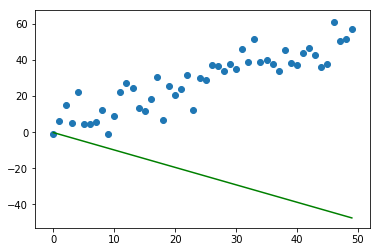

A: -0.15749531892553068
B: 1.0982553357992926


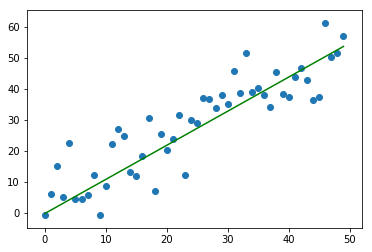

In [6]:
startingA = numpy.random.normal();
startingB = numpy.random.normal();

print("A: {}".format(startingA))
print("B: {}".format(startingB))

fileName = "batchGradientDescent_0.png"
filePath = os.path.join(graphDirectory, fileName)
CreateGraph(xDataSet, yDataSet, startingA, startingB, filePath, show=True, save=True)
errors = []

for i in range(epoch):
    fileName = "batchGradientDescent_{}.png".format(i)
    filePath = os.path.join(graphDirectory, fileName)
    errors.append(MSE(xDataSet, yDataSet, startingA, startingB))
    startingA, startingB = GradientDescent(startingA, startingB, xDataSet, yDataSet, .0001)
    CreateGraph(xDataSet, yDataSet, startingA, startingB, filePath, save=True)
    
print("A: {}".format(startingA))
print("B: {}".format(startingB))
CreateGraph(xDataSet, yDataSet, startingA, startingB, filePath, show=True)    

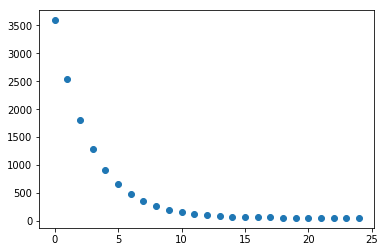

In [7]:
matplotlib.pyplot.clf()
matplotlib.pyplot.scatter(range(epoch), errors)

# Using Least Squares

In [8]:
for x,y in zip(xDataSet, yDataSet):
    numerator += (x - xAverage)*(y - yAverage)
    denominator += math.pow((x - xAverage), 2)

b = (numerator/denominator)
a = yAverage - (xAverage * b)

leastSquares = 0.0
leastSquaresGD = 0.0

y1 = (b * start) + a
y2 = (b * end) + a

A: 4.326610467209665
B: 0.9876424401368751


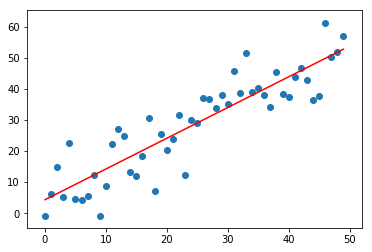

In [9]:
print("A: {}".format(a))
print("B: {}".format(b))
fileName = "linearRegression.png".format(i)
filePath = os.path.join(graphDirectory, fileName)
CreateGraph(xDataSet, yDataSet, a, b, filePath, color='r', save=True)

# Mean Squared Error

In [10]:
leastSquares = MSE(xDataSet, yDataSet, a, b)
leastSquaresGD = MSE(xDataSet, yDataSet, startingA, startingB)

In [11]:
print("Least Square MSE: {}".format(leastSquares))
print("Gradient Descent MSE: {}".format(leastSquaresGD))

Least Square MSE: 50.53986954906849
Gradient Descent MSE: 56.235247360027806
